In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Proste progowanie

Sprawa jest prosta. Jeśli wartość piksela jest większa niż wartość progowa, to przypisywana jest jedna wartość (może być biała), w przeciwnym razie przypisywana jest inna wartość (może być czarna). 

W tym celu używa się funkcji __cv2.threshold__. [dokumentacja](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
- Pierwszym argumentem jest obraz źródłowy, który powinien być obrazem w __skali szarości__. 
- Drugim argumentem jest wartość progowa, która służy do klasyfikacji wartości pikseli. 
- Trzeci argument to maxVal, który reprezentuje wartość, która ma być podana, jeśli wartość piksela jest większa (czasami mniejsza) od wartości progowej. 

OpenCV dostarcza różne metody progowania i decyduje o tym czwarty parametr funkcji. Są to:
- cv2.THRESH_BINARY:   $dst(x,y) = \texttt{maxval} ~~~ if ~~\texttt{src}(x,y) ~~> \texttt{thresh} else ~~{0}$
- cv2.THRESH_BINARY_INV: Odwrotność binarnej
- cv2.THRESH_TRUNC: $dst(x,y) = \texttt{thresh} ~~~ if ~~\texttt{src}(x,y) ~~> \texttt{thresh} else  ~~\texttt{src}(x,y)$
- cv2.THRESH_TOZERO: $dst(x,y) = \texttt{src}(x,y) ~~~ if ~~\texttt{src}(x,y) ~~> \texttt{thresh} else  ~~0$
- cv2.THRESH_TOZERO_INV: Odwrotność TOZERO



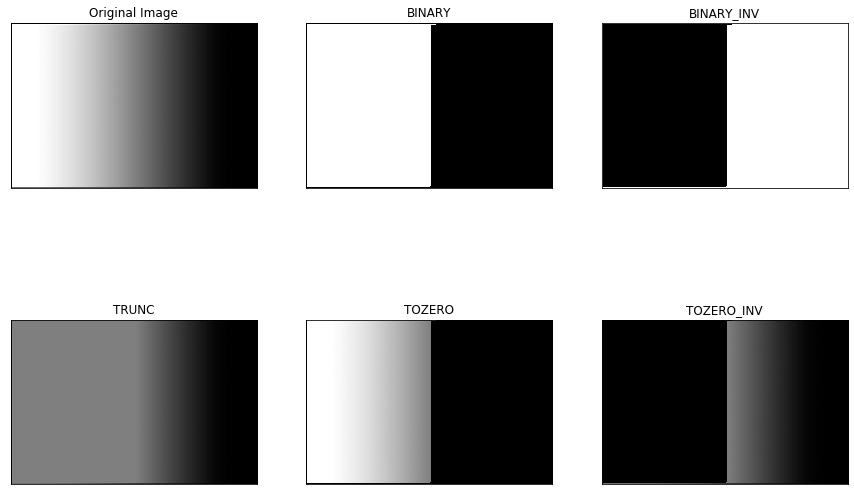

In [4]:
plt.rcParams['figure.figsize'] = [15, 10]

image = cv2.imread('agh_cv/gradient.png')

ret, thresh1 = cv2.threshold(image, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(image, thresh=127, maxval=255, type=cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(image, thresh=127, maxval=255, type=cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(image, thresh=127, maxval=255, type=cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1), imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Progowanie Adaptacyjne
W poprzedniej sekcji wykorzystaliśmy wartość globalną jako wartość progową. Ale może to nie być dobre we wszystkich warunkach, w których obraz ma różne warunki oświetleniowe w różnych obszarach. W takim przypadku wybieramy próg adaptacyjny. Wówczas algorytm oblicza próg dla małych obszarów obrazu. Otrzymujemy więc różne progi dla różnych regionów tego samego obrazu i daje nam to lepsze wyniki dla obrazów o różnym naświetleniu. Metoda adaptacyjna - decyduje o sposobie obliczania wartości progowej.

Ma trzy „specjalne” parametry wejściowe: [dokumentacja](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)

- __cv2.ADAPTIVE_THRESH_MEAN_C__: wartość progowa jest średnią obszaru sąsiedztwa lub __cv2.ADAPTIVE_THRESH_GAUSSIAN_C__: wartość progowa to ważona suma wartości sąsiedztwa, w których wagi są określone rozkładem gaussowskim.
- __Rozmiar bloku__ - decyduje o wielkości obszaru sąsiedztwa.
- __C__ - stała odejmowana od obliczonej średniej lub średniej ważonej.

### Progowanie Otsu

Jest to algorytm służący do progowania obrazu (binaryzacji), czyli konwersji obrazu w odcieniach szarości do obrazu binarnego. Opublikowany został w 1979 roku, a jego autorem jest Nobuyuki Otsu. Jest to metoda progowania globalnego, oparta na histogramie. Metoda polega na minimalizacji sumy ważonej wariancji dwóch klas (tła i obiektów pierwszego planu), co jest tożsame z maksymalizacją wariancji międzyklasowej.

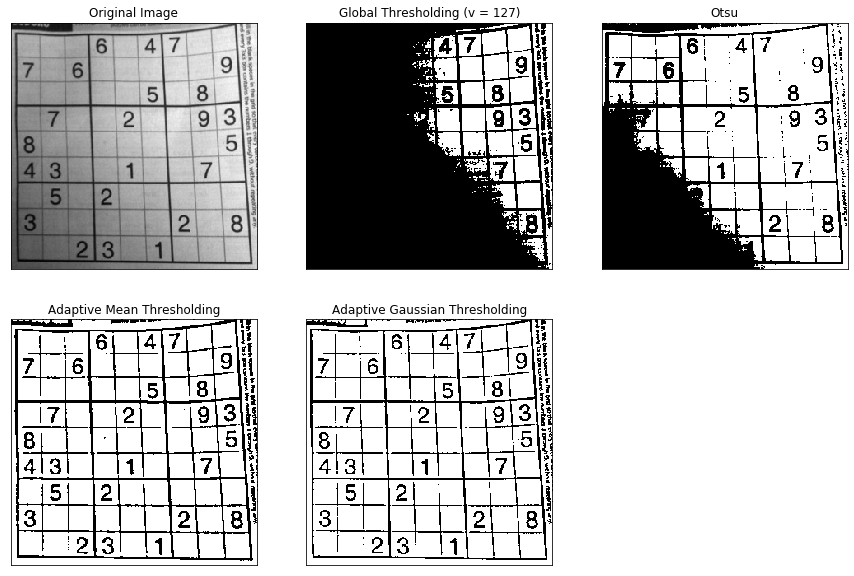

In [6]:
image = cv2.imread('agh_cv/sudoku_threshold.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# punkty do przekształcenia perspektywy
pts1 = np.float32([[50, 50], [400, 50], [15, 400], [400, 400]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# przekształcenie perspektywy
transformation_matrix = cv2.getPerspectiveTransform(pts1,pts2)
image = cv2.warpPerspective(image, transformation_matrix, (300,300))

# progowanie binarne
ret, th1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# progowanie adaptacyjne maxValue, adaptiveMethod, thresholdType, blockSize, C
th2 = cv2.adaptiveThreshold(image,
                            maxValue=255,
                            adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                            thresholdType=cv2.THRESH_BINARY,
                            blockSize=13,
                            C=8)
th3 = cv2.adaptiveThreshold(image,
                            maxValue=255,
                            adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            thresholdType=cv2.THRESH_BINARY,
                            blockSize=13,
                            C=8)
ret, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# imshow(th3, cmap='gray')


titles = ['Original Image', 'Global Thresholding (v = 127)', 'Otsu',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, th1, otsu, th2, th3]

for i in range(5):
    plt.subplot(2,3,i+1),imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Przykład książka w złym świetle

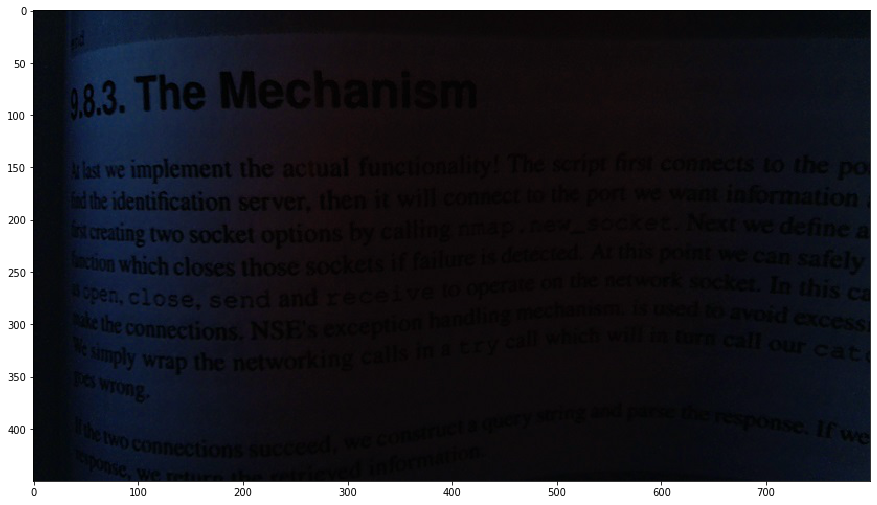

In [7]:
image = cv2.imread('agh_cv/book_threshold.png')
imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

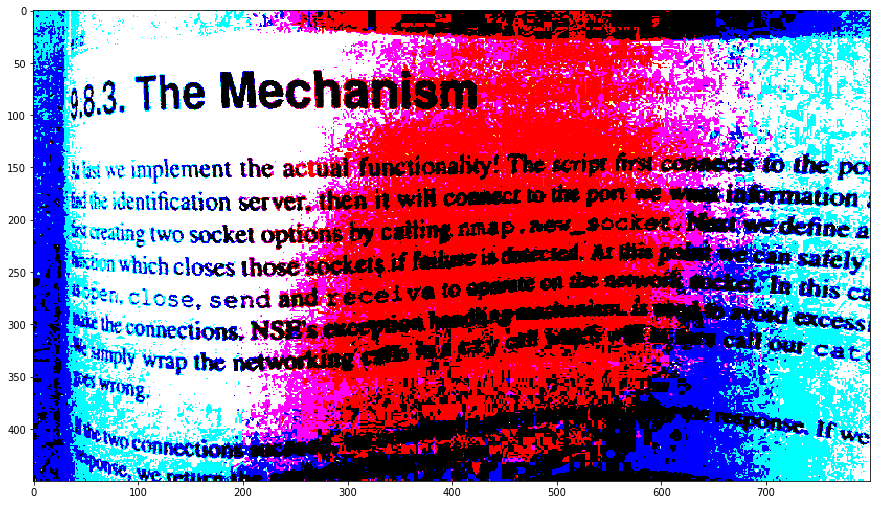

In [8]:
ret, threshold = cv2.threshold(image, 12, 255, cv2.THRESH_BINARY)
imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))

Obraz jest teraz nieco lepszy, ale nadal nie jest to dobra jakość - nadal niemożliwe byłoby wykorzystanie tego obrazka do OCRu. Zobaczmy, czy uda nam się to jeszcze bardziej polepszyć. Najpierw przekonwertujemy obrazek w skali szarości, a następnie wykonamy progowanie.

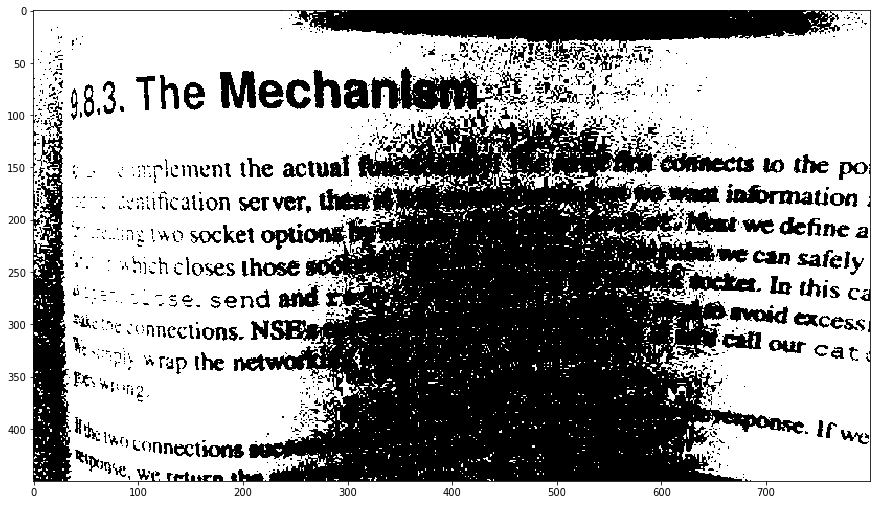

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 11, 255, cv2.THRESH_BINARY)
imshow(threshold)

Nie jest to najlepszy wynik, spróbujmy progowania adaptacyjnego jak w przykładzie z sudoku.

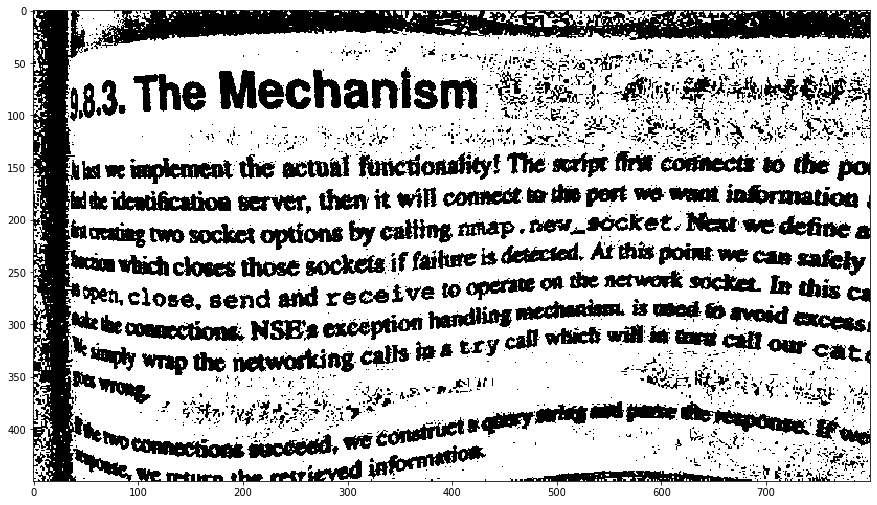

In [10]:
threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
imshow(threshold)

## Zadanie

Wypróbuj poznane metody progowania na zdjęciach zapisanych w plikach kolejno:
- 'agh_cv/task_thresholding1.png'
- 'agh_cv/task_thresholding2.png'
- 'agh_cv/task_thresholding3.png'

In [18]:
from ipywidgets import interact

def thresh(img, threshold):
    image = cv2.imread(img, 0)
    imshow(cv2.threshold(image, thresh=threshold, maxval=255, type=cv2.THRESH_BINARY)[1])
    
interact(thresh, img=['agh_cv/task_thresholding1.png', 'agh_cv/task_thresholding2.png', 'agh_cv/task_thresholding3.png'], threshold=range(0, 256))

interactive(children=(Dropdown(description='img', options=('agh_cv/task_thresholding1.png', 'agh_cv/task_thres…

<function __main__.thresh(img, threshold)>

In [19]:
from ipywidgets import interact
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def thresh_adaptive(img, blockSize, C):
    image = cv2.imread(img, 0)
    imshow(cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C))
    
interact(thresh_adaptive, img=['agh_cv/task_thresholding1.png', 'agh_cv/task_thresholding2.png', 'agh_cv/task_thresholding3.png'], blockSize=range(3, 500, 2), C=range(0, 256))

interactive(children=(Dropdown(description='img', options=('agh_cv/task_thresholding1.png', 'agh_cv/task_thres…

<function __main__.thresh_adaptive(img, blockSize, C)>